In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.ticker as mtick

In [31]:
# read in data file
oscar_dataset = pd.read_csv("the_oscar_award.csv")

# inspect
oscar_dataset.head()


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [32]:

#summarize
oscar_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.3+ KB


In [33]:
#count null values
print(oscar_dataset.isna().sum())
#drop null values
oscars_clean = oscar_dataset.dropna(subset = "film")
print(oscars_clean.isna().sum())

#print unique values in category
print(oscars_clean["category"].unique())


year_film          0
year_ceremony      0
ceremony           0
category           0
name               4
film             315
winner             0
dtype: int64
year_film        0
year_ceremony    0
ceremony         0
category         0
name             0
film             0
winner           0
dtype: int64
['ACTOR' 'ACTRESS' 'ART DIRECTION' 'CINEMATOGRAPHY'
 'DIRECTING (Comedy Picture)' 'DIRECTING (Dramatic Picture)'
 'ENGINEERING EFFECTS' 'OUTSTANDING PICTURE' 'UNIQUE AND ARTISTIC PICTURE'
 'WRITING (Adaptation)' 'WRITING (Original Story)'
 'WRITING (Title Writing)' 'DIRECTING' 'WRITING' 'OUTSTANDING PRODUCTION'
 'SOUND RECORDING' 'SHORT SUBJECT (Cartoon)' 'SHORT SUBJECT (Comedy)'
 'SHORT SUBJECT (Novelty)' 'ASSISTANT DIRECTOR' 'FILM EDITING'
 'MUSIC (Scoring)' 'MUSIC (Song)' 'DANCE DIRECTION' 'WRITING (Screenplay)'
 'ACTOR IN A SUPPORTING ROLE' 'ACTRESS IN A SUPPORTING ROLE'
 'SHORT SUBJECT (Color)' 'SHORT SUBJECT (One-reel)'
 'SHORT SUBJECT (Two-reel)' 'MUSIC (Original Score)'
 'CINEM

In [34]:

#only include the categories from the website
filtered_categories = ['ACTOR IN A LEADING ROLE','ACTRESS IN A LEADING ROLE','ACTOR IN A SUPPORTING ROLE','ACTRESS IN A SUPPORTING ROLE', 'ANIMATED FEATURE FILM', 
            'CINEMATOGRAPHY','COSTUME DESIGN','DIRECTING','DOCUMENTARY FEATURE FILM','FILM EDITING','INTERNATIONAL FEATURE FILM','MAKEUP AND HAIRSTYLING',
            'MUSIC (ORIGINAL SCORE)','MUSIC (ORIGINAL SONG)','BEST PICTURE','PRODUCTION DESIGN','ANIMATED SHORT FILM','LIVE ACTION SHORT FILM',
            'SOUND','VISUAL EFFECTS','WRITING (ADAPTED SCREENPLAY)','WRITING (ORIGINAL SCREENPLAY)']
#filtered years to be more recent (past 10 yrs)
filtered_years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]


# Create a new DataFrame with only filtered categories
filtered_data = oscars_clean[oscars_clean['category'].isin(filtered_categories)]
#filtered_data = filtered_data[filtered_data['year_film'].isin(filtered_years)]

#checking
print(filtered_data.head())
filtered_data.isna().sum()


    year_film  year_ceremony  ceremony        category            name  \
8        1927           1928         1  CINEMATOGRAPHY   George Barnes   
9        1927           1928         1  CINEMATOGRAPHY  Charles Rosher   
10       1927           1928         1  CINEMATOGRAPHY     Karl Struss   
51       1928           1929         2  CINEMATOGRAPHY   George Barnes   
52       1928           1929         2  CINEMATOGRAPHY  Clyde De Vinna   

                               film  winner  
8                 The Devil Dancer;   False  
9                           Sunrise    True  
10                          Sunrise    True  
51            Our Dancing Daughters   False  
52  White Shadows in the South Seas    True  


year_film        0
year_ceremony    0
ceremony         0
category         0
name             0
film             0
winner           0
dtype: int64

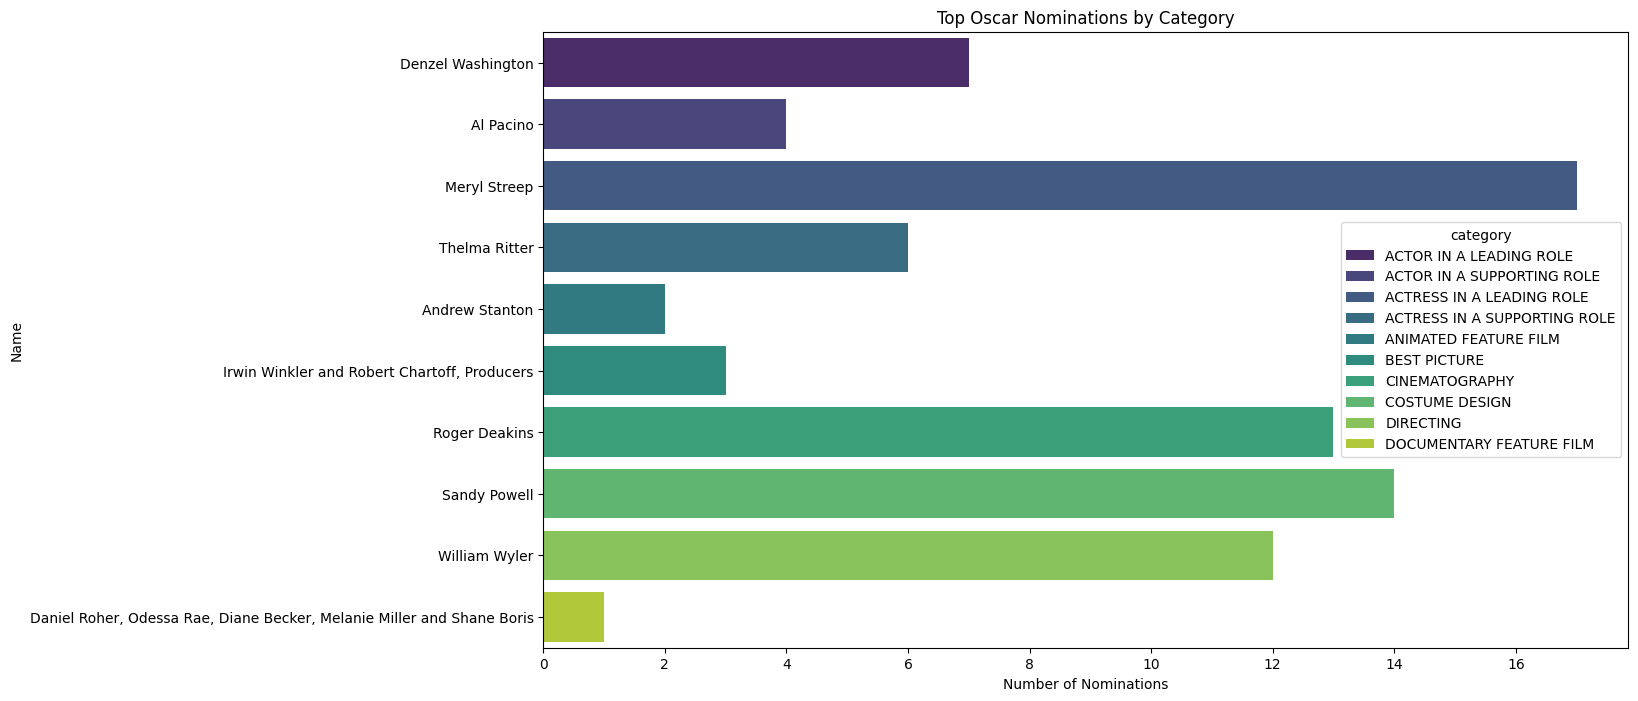

In [35]:

# Find the most frequent winners for each category
top_winners_by_category = filtered_data.groupby(['category', 'name']).size().reset_index(name='count')
top_winners_by_category = top_winners_by_category.sort_values(by=['category', 'count'], ascending=[True, False])
top_winners_by_category = top_winners_by_category.drop_duplicates(subset='category', keep='first')

# Plot the top winners by category
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='name', hue='category', data=top_winners_by_category.head(10), palette='viridis')
plt.title('Top Oscar Nominations by Category')
plt.xlabel('Number of Nominations')
plt.ylabel('Name')
plt.show()


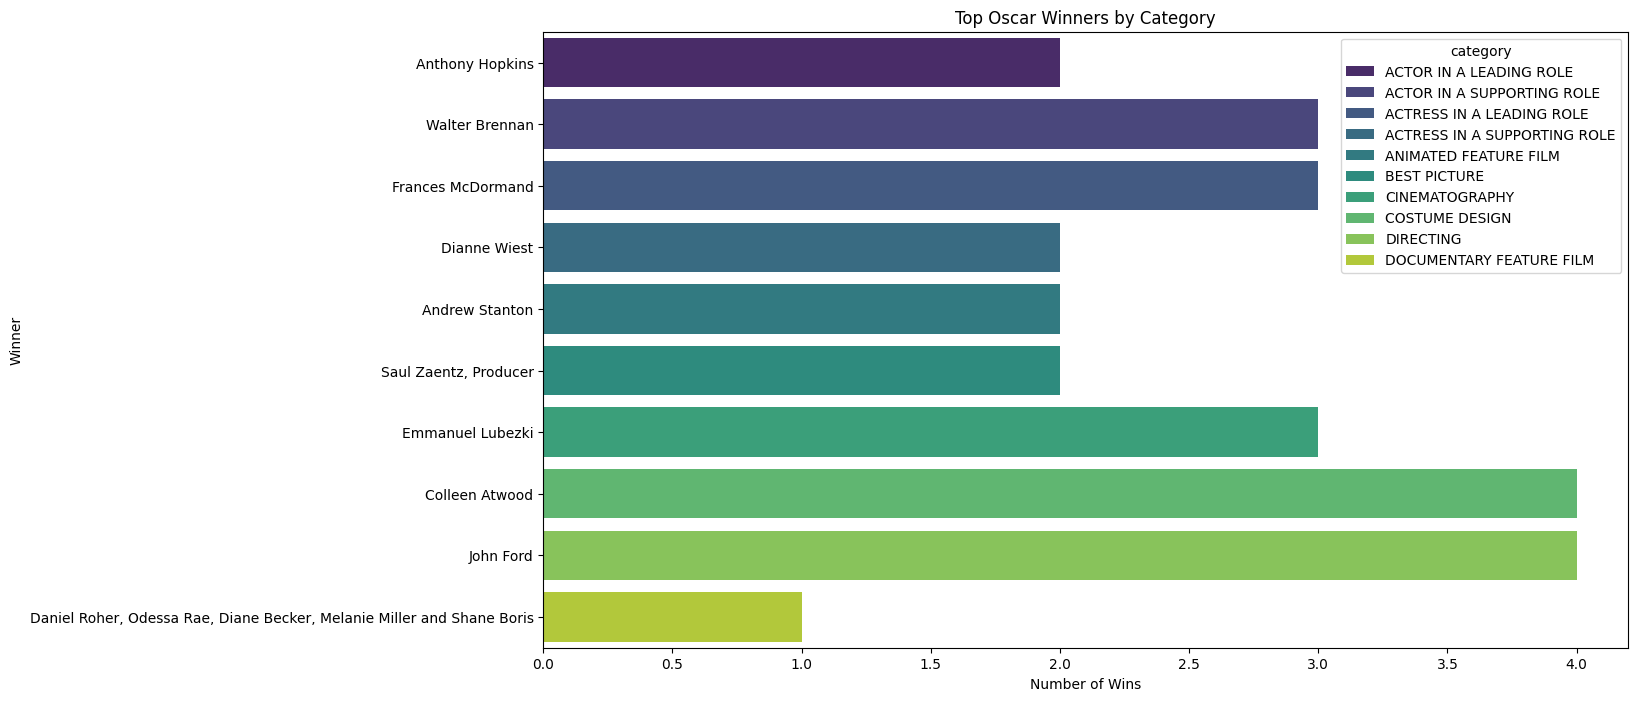

In [36]:
# Filter the data for winners
winners_data = filtered_data[filtered_data['winner']]

# Group by category and name, count the wins
top_winners_by_category = winners_data.groupby(['category', 'name']).size().reset_index(name='count')

# Sort and keep only the top winners for each category
top_winners_by_category = top_winners_by_category.sort_values(by=['category', 'count'], ascending=[True, False])
top_winners_by_category = top_winners_by_category.drop_duplicates(subset='category', keep='first')

# Plot the top winners by category
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='name', hue='category', data=top_winners_by_category.head(10), palette='viridis')
plt.title('Top Oscar Winners by Category')
plt.xlabel('Number of Wins')
plt.ylabel('Winner')
plt.show()

/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_33628/654125118.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_nominations', y='film', data=movie_nominations.head(10), palette='viridis')


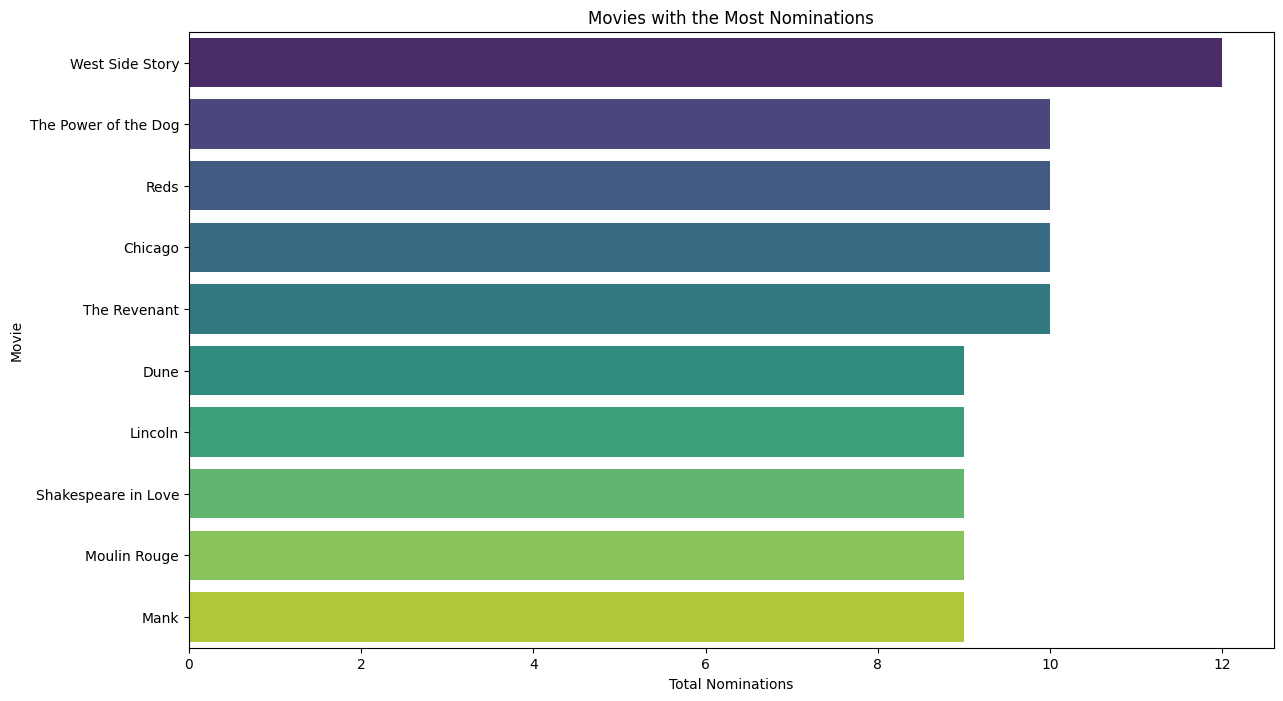

In [37]:
# Find the total nominations for each movie
movie_nominations = filtered_data.groupby('film').size().reset_index(name='total_nominations')
movie_nominations = movie_nominations.sort_values(by='total_nominations', ascending=False)

# Plot the top movies with the most nominations
plt.figure(figsize=(14, 8))
sns.barplot(x='total_nominations', y='film', data=movie_nominations.head(10), palette='viridis')
plt.title('Movies with the Most Nominations')
plt.xlabel('Total Nominations')
plt.ylabel('Movie')
plt.show()



In [38]:
#import current oscar nominations
oscars_2024 = pd.read_excel("Oscars_2024.xlsx")

#inspect
oscars_2024.info()
oscars_2024.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              120 non-null    object 
 1   name                  120 non-null    object 
 2   film                  120 non-null    object 
 3   genre                 120 non-null    object 
 4   worldwide box office  120 non-null    int64  
 5   rotten tomatoes       105 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ KB


,category,name,film,genre,worldwide box office,rotten tomatoes
0,Actor In A Leading Role,Bradley Cooper,Maestro,Romance,383532,0.79
1,Actor In A Leading Role,Colman Domingo,Rustin,Drama,0,0.84
2,Actor In A Leading Role,Paul Giamatti,The Holdovers,Comedy,42246660,0.97
3,Actor In A Leading Role,Cillian Murphy,Oppenheimer,Thriller,957700200,0.93
4,Actor In A Leading Role,Jeffrey Wright,American Fiction,Comedy,21983570,0.94
5,Actress In A Leading Role,Annette Bening,Nyad,Sports,16056,0.86
6,Actress In A Leading Role,Lily Gladstone,Killers of the Flower Moon,Western,156874211,0.93
7,Actress In A Leading Role,Sandra Huller,Anatomy of a Fall,Thriller,31054565,0.96
8,Actress In A Leading Role,Carey Mulligan,Maestro,Romance,383532,0.79
9,Actress In A Leading Role,Emma Stone,Poor Things,Sci-Fi,104571592,0.92


/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_33628/1158341781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_nominations', y='film', data=movie_nominations_2024.head(10), palette='viridis')


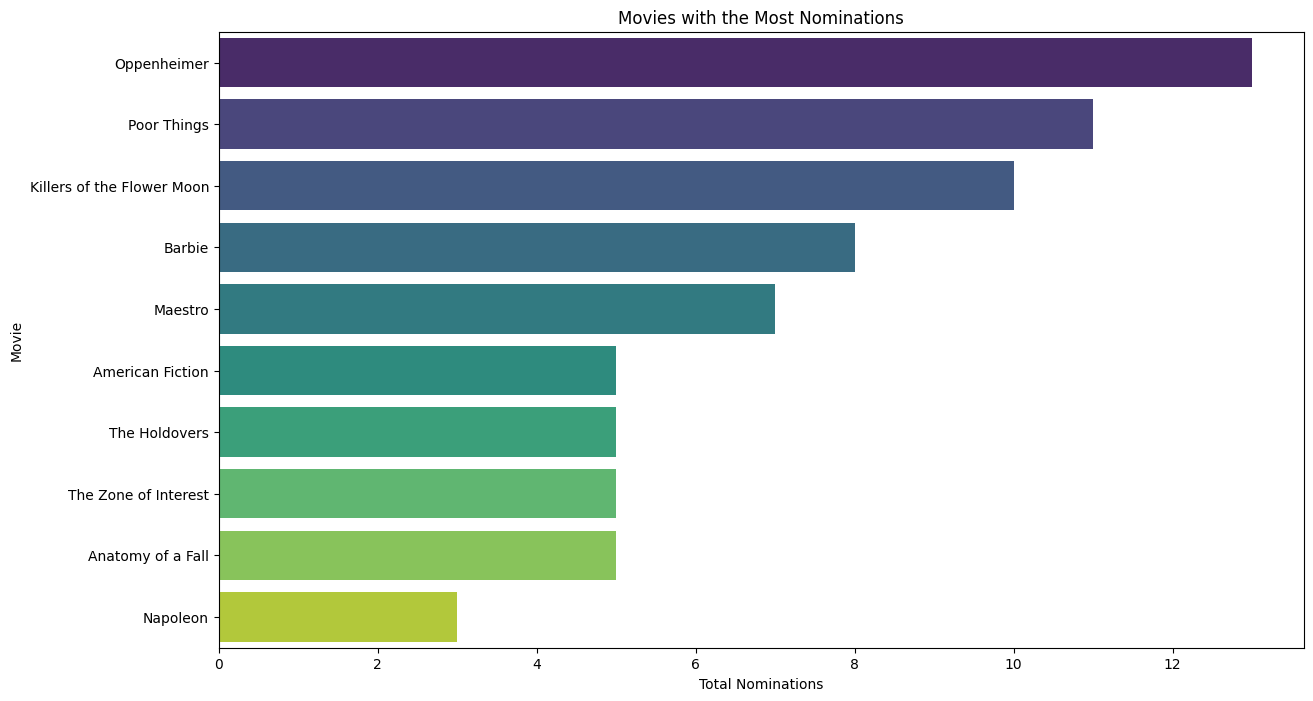

In [39]:
#visuals: Movies with most nominations
movie_nominations_2024 = oscars_2024.groupby('film').size().reset_index(name='total_nominations')
movie_nominations_2024 = movie_nominations_2024.sort_values(by='total_nominations', ascending=False)

# Plot the top movies with the most nominations
plt.figure(figsize=(14, 8))
sns.barplot(x='total_nominations', y='film', data=movie_nominations_2024.head(10), palette='viridis')
plt.title('Movies with the Most Nominations')
plt.xlabel('Total Nominations')
plt.ylabel('Movie')
plt.show()


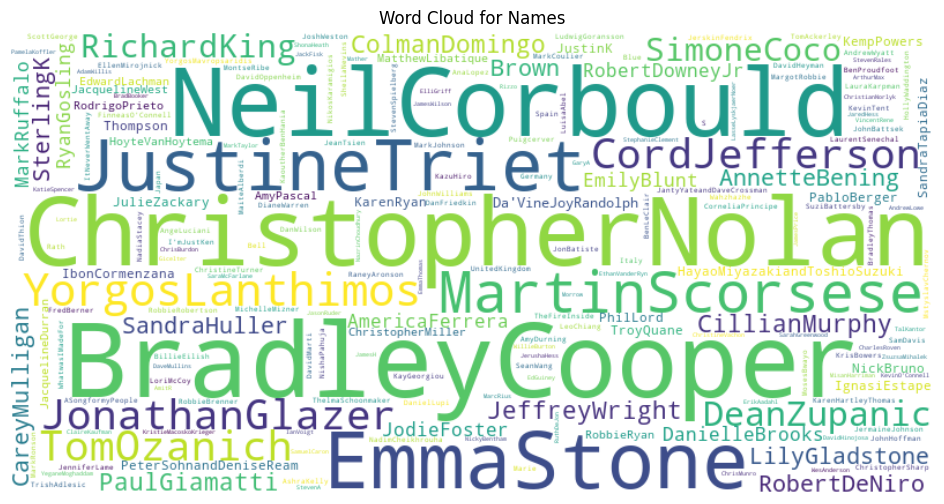

In [40]:
# Combine first and last names with an underscore
oscars_2024['Full Name'] = oscars_2024['name'].str.replace(' ', '')

# Generate word cloud for names
def generate_wordcloud(text):
    return WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

# Plot the word cloud for names
wordcloud_names = generate_wordcloud(' '.join(oscars_2024['Full Name']))
# Replace underscores with spaces before displaying
wordcloud_names.words_ = {key.replace('_', ' '): value for key, value in wordcloud_names.words_.items()}
#plt.subplot(1, 2, 1)
plt.imshow(wordcloud_names, interpolation='bilinear')
plt.title('Word Cloud for Names')
plt.axis('off')
plt.show()


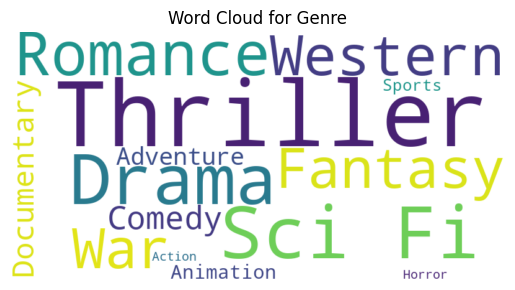

In [41]:

# Plot the word cloud for genres
wordcloud_genre = generate_wordcloud(' '.join(oscars_2024['genre']))
#plt.subplot(1, 2, 2)
plt.imshow(wordcloud_genre, interpolation='bilinear')
plt.title('Word Cloud for Genre')
plt.axis('off')

plt.show()

In [42]:
#checking which names appear in past data, so who's been nominated before
common_names = pd.merge(filtered_data['name'], oscars_2024['name'], how='inner')

unique_names = common_names['name'].unique()

unique_names = unique_names[:-3]
print(unique_names)

#checking whos won before
common_names_winners = filtered_data[filtered_data['name'].isin(unique_names) & filtered_data['winner']]

print(common_names_winners.to_string())

['Thelma Schoonmaker' 'Robert De Niro' 'Jodie Foster' 'Martin Scorsese'
 'Annette Bening' 'Robert Downey Jr.' 'Jacqueline West' 'Edward Lachman'
 'Paul Giamatti' 'Rodrigo Prieto' 'Jacqueline Durran' 'Ryan Gosling'
 'Carey Mulligan' 'Mark Ruffalo' 'Matthew Libatique' 'Kevin Tent'
 'Bradley Cooper' 'Hayao Miyazaki and Toshio Suzuki' 'Emma Stone'
 'Christopher Nolan' 'Robbie Ryan' 'Yorgos Lanthimos'
 'Yorgos Mavropsaridis' 'Spain']
       year_film  year_ceremony  ceremony                    category                name                      film  winner
5198        1974           1975        47  ACTOR IN A SUPPORTING ROLE      Robert De Niro     The Godfather Part II    True
5835        1980           1981        53     ACTOR IN A LEADING ROLE      Robert De Niro               Raging Bull    True
5889        1980           1981        53                FILM EDITING  Thelma Schoonmaker               Raging Bull    True
6689        1988           1989        61   ACTRESS IN A LEADING ROLE  

In [43]:
# Group by 'Category' and calculate the mean of 'Rotten Tomatoes' scores
avg_scores = oscars_2024.groupby('category')['rotten tomatoes'].mean().sort_values(ascending=False)

# Print or visualize the result
print(avg_scores)

category
Documentary Feature Film         0.978
International Feature Film       0.944
Film Editing                     0.942
Directing                        0.934
Best Picture                     0.921
Writing (Adapted Screenplay)     0.920
Actor In A Supporting Role       0.920
Writing (Original Screenplay)    0.916
Animated Feature Film            0.908
Actor In A Leading Role          0.894
Actress In A Supporting Role     0.892
Actress In A Leading Role        0.892
Music (Original Score)           0.884
Cinematography                   0.878
Music (Original Song)            0.864
Sound                            0.856
Costume Design                   0.848
Production Design                0.848
Makeup And Hairstyling           0.814
Visual Effects                   0.802
Animated Short Film                NaN
Documentary Short Film             NaN
Live Action Short Film             NaN
Name: rotten tomatoes, dtype: float64


/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_33628/13830945.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rotten tomatoes', y='film', data=top_movies_by_rt, palette='viridis')


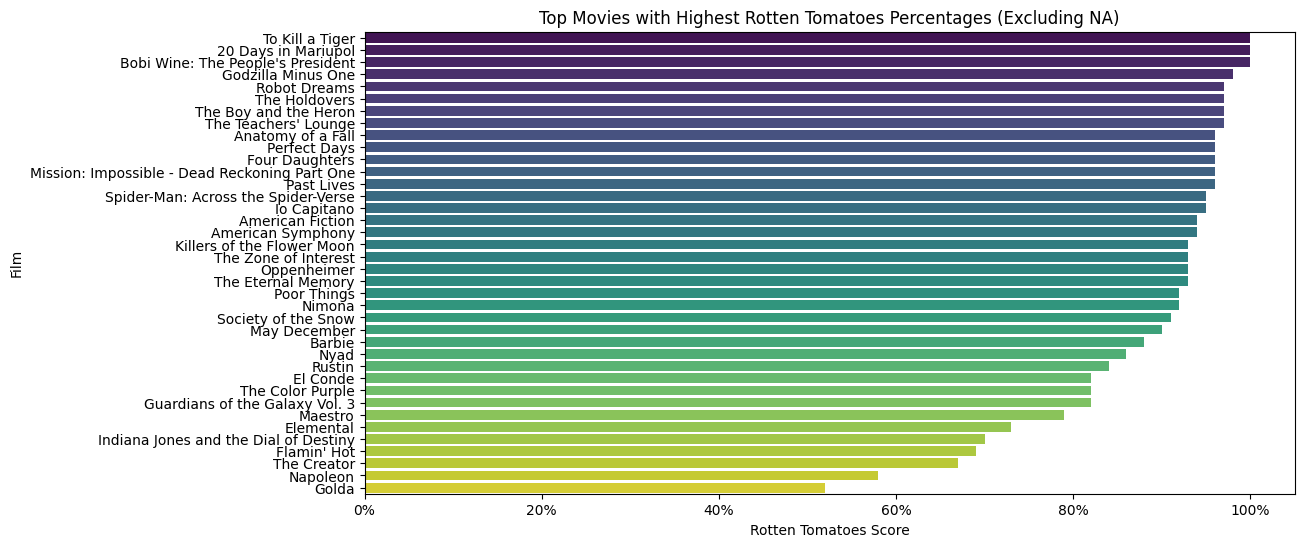

In [44]:
# Exclude NA values
top_movies_by_rt = oscars_2024.dropna(subset=['rotten tomatoes'])

# Sort the data by rotten tomatoes values in descending order to get the top movies
top_movies_by_rt = top_movies_by_rt.sort_values(by='rotten tomatoes', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='rotten tomatoes', y='film', data=top_movies_by_rt, palette='viridis')

# Set x-axis scale to percentage
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Top Movies with Highest Rotten Tomatoes Percentages (Excluding NA)')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Film')
plt.show()

/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_33628/1416679795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rotten tomatoes', y='film', data=movies_rt.head(10), palette='viridis')


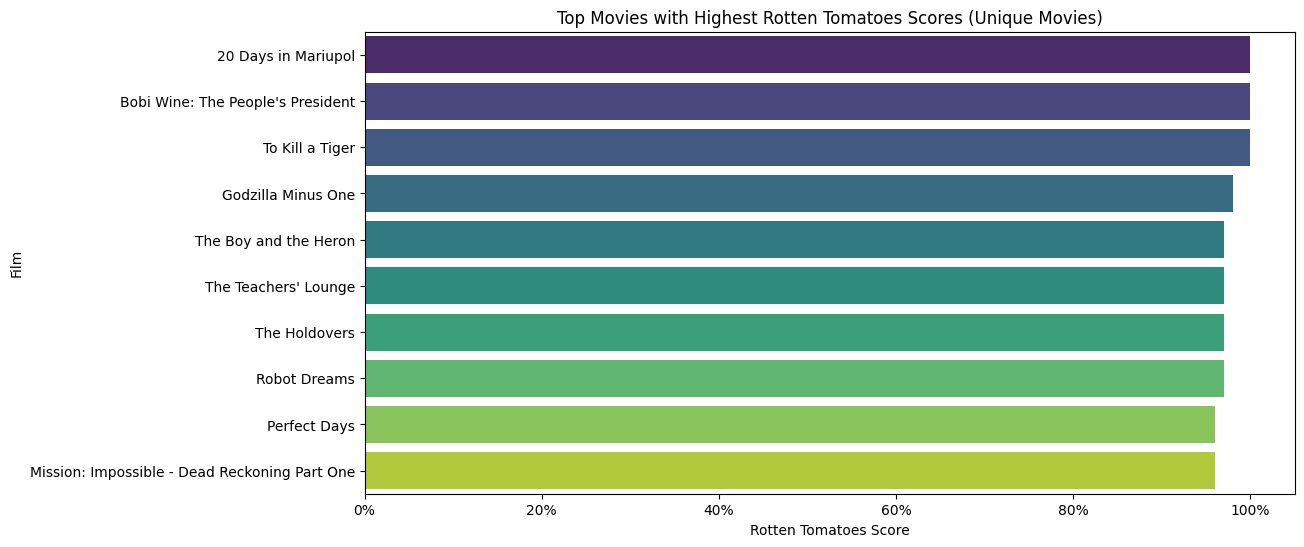

In [45]:
# Group by film and get the maximum Rotten Tomatoes score for each movie
movies_rt = oscars_2024.groupby('film')['rotten tomatoes'].max().reset_index()

# Sort the data by the maximum Rotten Tomatoes score in descending order
movies_rt = movies_rt.sort_values(by='rotten tomatoes', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='rotten tomatoes', y='film', data=movies_rt.head(10), palette='viridis')

# Set x-axis scale to percentage
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.title('Top Movies with Highest Rotten Tomatoes Scores (Unique Movies)')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Film')
plt.show()

/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_33628/979076535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='worldwide box office', y='film', data=movies_bo.head(10), palette='viridis')


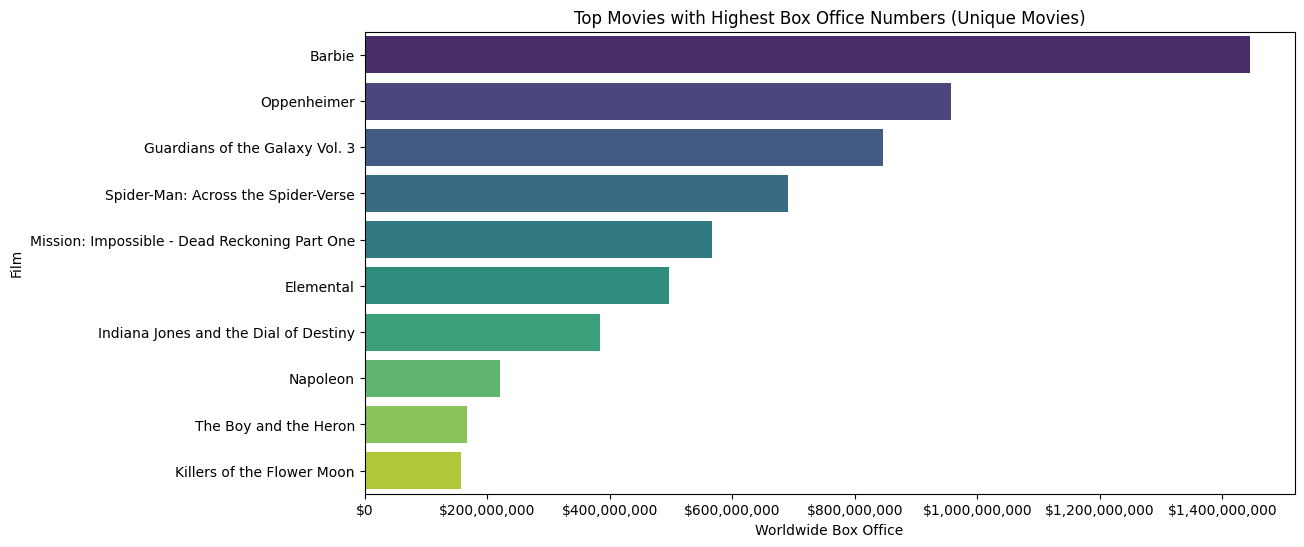

In [46]:
# Group by film and get the maximum worldwide box office value for each movie
movies_bo = oscars_2024.groupby('film')['worldwide box office'].max().reset_index()

# Sort the data by the maximum worldwide box office value in descending order
movies_bo = movies_bo.sort_values(by='worldwide box office', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='worldwide box office', y='film', data=movies_bo.head(10), palette='viridis')

# Set x-axis scale to billions for better readability
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.title('Top Movies with Highest Box Office Numbers (Unique Movies)')
plt.xlabel('Worldwide Box Office')
plt.ylabel('Film')
plt.show()

In [47]:
na_values = oscars_2024[oscars_2024['rotten tomatoes'].isna()]

#print(na_values)

# Remove rows with NA values
oscars_2024_cleaned = oscars_2024.dropna()
oscars_2024_cleaned.drop(['Full Name'], axis=1, inplace=True)

# Print 
print(oscars_2024_cleaned.to_string())

                          category                                                                                 name                                           film        genre  worldwide box office  rotten tomatoes
0          Actor In A Leading Role                                                                       Bradley Cooper                                        Maestro      Romance                383532             0.79
1          Actor In A Leading Role                                                                       Colman Domingo                                         Rustin        Drama                     0             0.84
2          Actor In A Leading Role                                                                        Paul Giamatti                                  The Holdovers       Comedy              42246660             0.97
3          Actor In A Leading Role                                                                       Cillian Murphy     

/var/folders/s0/2bmbf89j5zdbr4fc8z67kwm00000gn/T/ipykernel_33628/480706475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars_2024_cleaned.drop(['Full Name'], axis=1, inplace=True)


In [48]:
# Select relevant features
features = ['category', 'name', 'film', 'worldwide box office', 'rotten tomatoes']

#drop na 
data = oscars_2024_cleaned[features].dropna()

# Rank nominees within each category based on box office and Rotten Tomatoes
data['box office rank'] = data.groupby('category')['worldwide box office'].rank(ascending=False, method='min')
data['rotten tomatoes rank'] = data.groupby('category')['rotten tomatoes'].rank(ascending=False, method='min')

# Calculate a combined rank 
data['combined rank'] = data['box office rank'] + data['rotten tomatoes rank']

# Sort the data by category and combined rank to find the top nominee in each category
top_nominees = data.sort_values(by=['category', 'combined rank']).groupby('category').head(1)

# Display the top nominees in each category
# Format the numeric columns to display as integers
top_nominees['box office rank'] = top_nominees['box office rank'].astype(int)
top_nominees['rotten tomatoes rank'] = top_nominees['rotten tomatoes rank'].astype(int)
top_nominees['combined rank'] = top_nominees['combined rank'].astype(int)

# Display the formatted DataFrame
print(top_nominees.to_string(index=False))



                     category                                                          name                                          film  worldwide box office  rotten tomatoes  box office rank  rotten tomatoes rank  combined rank
      Actor In A Leading Role                                                 Paul Giamatti                                 The Holdovers              42246660             0.97                2                     1              3
   Actor In A Supporting Role                                             Robert Downey Jr.                                   Oppenheimer             957700200             0.93                2                     2              4
    Actress In A Leading Role                                                Lily Gladstone                    Killers of the Flower Moon             156874211             0.93                1                     2              3
 Actress In A Supporting Role                                               

In [49]:
#drop columns
na_values = na_values.drop(['genre', 'worldwide box office', 'rotten tomatoes', 'Full Name'], axis=1)

na_values

#add imdb reviews and letterboxd reviews
na_values["imdb score"] = [6.3,6.5,6.1,7.3,7.1,6.6,7.4,6.7,7.0,6.3,6.2,7.1,7.1,7.1,7.4]
na_values["letterboxd score"] = [2.9,3.3,3.1,3.8,3.8,3.1,3.8,3.3,3.5,2.6,2.5,3.6,3.6,3.5,3.8]

na_values

,category,name,film,imdb score,letterboxd score
45,Documentary Short Film,"Sheila Nevins , Trish Adlesic",The ABCs of Book Banning,6.3,2.9
46,Documentary Short Film,"John Hoffman , Christine Turner",The Barber of Little Rock,6.5,3.3
47,Documentary Short Film,"S. Leo Chiang , Jean Tsien",Island in Between,6.1,3.1
48,Documentary Short Film,"Ben Proudfoot , Kris Bowers",The Last Repair Shop,7.3,3.8
49,Documentary Short Film,"Sean Wang , Sam Davis",Nai Nai & Wai Po,7.1,3.8
90,Animated Short Film,"Tal Kantor , Amit R. Gicelter",Letter to a Pig,6.6,3.1
91,Animated Short Film,"Jerusha Hess , Jared Hess",Ninety-Five Senses,7.4,3.8
92,Animated Short Film,Yegane Moghaddam,Our Uniform,6.7,3.3
93,Animated Short Film,"Stephanie Clement , Marc Rius",Pachyderme,7.0,3.5
94,Animated Short Film,"Dave Mullins , Brad Booker",War is Over! Inspired by the Music of John & Yoko,6.3,2.6


In [50]:
# Rank nominees within each category based on IMDb and Letterboxd scores
na_values['imdb rank'] = na_values.groupby('category')['imdb score'].rank(ascending=False, method='min')
na_values['letterboxd rank'] = na_values.groupby('category')['letterboxd score'].rank(ascending=False, method='min')

# Calculate a combined rank 
na_values['combined rank'] = na_values['imdb rank'] + na_values['letterboxd rank']

# Sort the data by category and combined rank to find the top nominee in each category
top_nominees_sf = na_values.sort_values(by=['category', 'combined rank']).groupby('category').head(1)

# Display the top nominees in each category
# Format the numeric columns to display as integers
top_nominees_sf['imdb rank'] = top_nominees_sf['imdb rank'].astype(int)
top_nominees_sf['letterboxd rank'] = top_nominees_sf['letterboxd rank'].astype(int)
top_nominees_sf['combined rank'] = top_nominees_sf['combined rank'].astype(int)

# Display the formatted DataFrame
print(top_nominees_sf.to_string(index=False))

              category                        name                               film  imdb score  letterboxd score  imdb rank  letterboxd rank  combined rank
   Animated Short Film   Jerusha Hess , Jared Hess                 Ninety-Five Senses         7.4               3.8          1                1              2
Documentary Short Film Ben Proudfoot , Kris Bowers               The Last Repair Shop         7.3               3.8          1                1              2
Live Action Short Film Wes Anderson , Steven Rales The Wonderful Story of Henry Sugar         7.4               3.8          1                1              2


In [51]:
#combine all predictions together
combined_data = pd.concat([top_nominees_sf[['category', 'name', 'film']], top_nominees[['category', 'name', 'film']]], ignore_index=True)
combined_data

,category,name,film
0,Animated Short Film,"Jerusha Hess , Jared Hess",Ninety-Five Senses
1,Documentary Short Film,"Ben Proudfoot , Kris Bowers",The Last Repair Shop
2,Live Action Short Film,"Wes Anderson , Steven Rales",The Wonderful Story of Henry Sugar
3,Actor In A Leading Role,Paul Giamatti,The Holdovers
4,Actor In A Supporting Role,Robert Downey Jr.,Oppenheimer
5,Actress In A Leading Role,Lily Gladstone,Killers of the Flower Moon
6,Actress In A Supporting Role,Emily Blunt,Oppenheimer
7,Animated Feature Film,Hayao Miyazaki and Toshio Suzuki,The Boy and the Heron
8,Best Picture,Mark Johnson,The Holdovers
9,Cinematography,Hoyte Van Hoytema,Oppenheimer
